In [1]:
import fastf1
import fastf1.plotting
import numpy as np
fastf1.plotting.setup_mpl()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fastf1.Cache.enable_cache('cache')

For reference, below you can change the number depicting a championship year to get the corresponding year's schedule including valuable information such as dates, session times, locations, round number, etc.

In [2]:
fastf1.get_event_schedule(2023)

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25 19:30:00,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00,Practice 2,2023-02-24 10:00:00,Practice 3,2023-02-25 10:00:00,None,NaT,None,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00,Practice 2,2023-03-03 18:00:00,Practice 3,2023-03-04 14:30:00,Qualifying,2023-03-04 18:00:00,Race,2023-03-05 18:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00,Practice 2,2023-03-17 20:00:00,Practice 3,2023-03-18 16:30:00,Qualifying,2023-03-18 20:00:00,Race,2023-03-19 20:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02 17:00:00,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00,Practice 2,2023-03-31 16:00:00,Practice 3,2023-04-01 12:30:00,Qualifying,2023-04-01 16:00:00,Race,2023-04-02 15:00:00,True
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30 17:00:00,Azerbaijan Grand Prix,sprint_shootout,Practice 1,2023-04-28 13:30:00,Qualifying,2023-04-28 17:00:00,Sprint Shootout,2023-04-29 12:30:00,Sprint,2023-04-29 17:30:00,Race,2023-04-30 15:00:00,True
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07 17:30:00,Miami Grand Prix,conventional,Practice 1,2023-05-05 14:00:00,Practice 2,2023-05-05 17:30:00,Practice 3,2023-05-06 12:30:00,Qualifying,2023-05-06 16:00:00,Race,2023-05-07 15:30:00,True
6,6,Italy,Imola,FORMULA 1 QATAR AIRWAYS GRAN PREMIO DEL MADE I...,2023-05-21 17:00:00,Emilia Romagna Grand Prix,conventional,Practice 1,2023-05-19 13:30:00,Practice 2,2023-05-19 17:00:00,Practice 3,2023-05-20 12:30:00,Qualifying,2023-05-20 16:00:00,Race,2023-05-21 15:00:00,True
7,7,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28 17:00:00,Monaco Grand Prix,conventional,Practice 1,2023-05-26 13:30:00,Practice 2,2023-05-26 17:00:00,Practice 3,2023-05-27 12:30:00,Qualifying,2023-05-27 16:00:00,Race,2023-05-28 15:00:00,True
8,8,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04 17:00:00,Spanish Grand Prix,conventional,Practice 1,2023-06-02 13:30:00,Practice 2,2023-06-02 17:00:00,Practice 3,2023-06-03 12:30:00,Qualifying,2023-06-03 16:00:00,Race,2023-06-04 15:00:00,True
9,9,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18 16:00:00,Canadian Grand Prix,conventional,Practice 1,2023-06-16 13:30:00,Practice 2,2023-06-16 17:00:00,Practice 3,2023-06-17 12:30:00,Qualifying,2023-06-17 16:00:00,Race,2023-06-18 14:00:00,True


Import the session using get_session(year, round, session_type).
Round can be either a number or a string.
The session type can be one of P1, P2, P3, Q, R.

In [3]:
session = fastf1.get_session(2023, 'Miami', 'R')
session.load()

core           INFO 	Loading data for Miami Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/Library/Frameworks/Python.framewo

Lets look at how track temperature changed over time.

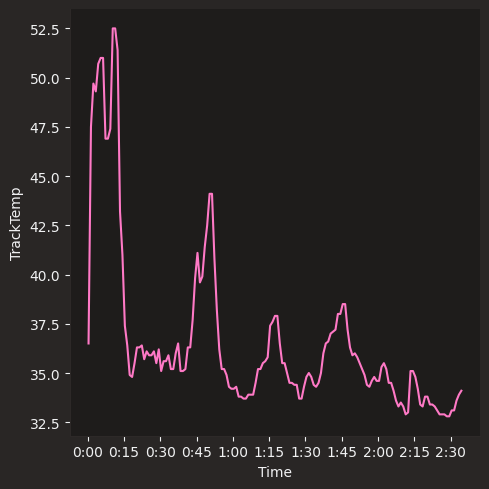

In [4]:
sns.relplot(data=session.weather_data, x='Time', y='TrackTemp', kind='line');

To visualize how the laptimes of teammates changes over all laps of the race, first change which team you'd like to investigate in the cell below.

Example: team_name = "Red Bull Racing" or team_name = "Mercedes" or team_name = "Ferrari"

In [5]:
team_name = "McLaren"

Then run this cell

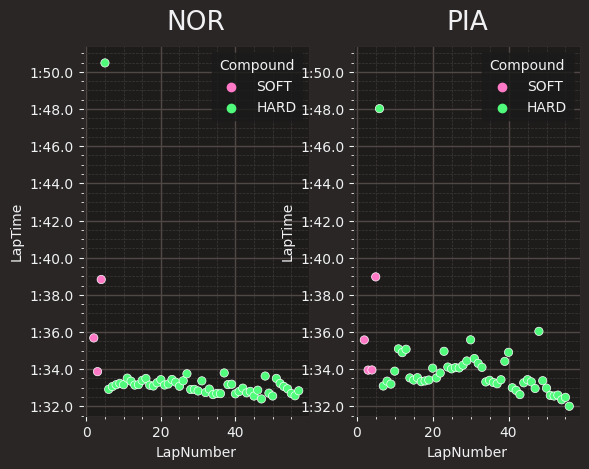

In [6]:
team = session.laps.pick_team(team_name)
team = team[team["LapNumber"] != 1]
team = team.reset_index()
driver1 = team[team["Driver"] == team["Driver"][0]].reset_index()

driver2 = team[team["Driver"] != driver1["Driver"][0]].reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.scatterplot(data=driver1, x="LapNumber", y="LapTime", hue="Compound", ax=ax1)
sns.scatterplot(data=driver2, x="LapNumber", y="LapTime", hue="Compound", ax=ax2)

ax1.invert_yaxis()
ax1.set_title(driver1["Driver"][0])
ax2.invert_yaxis()
ax2.set_ylim(ax1.axes.get_ylim())
ax2.set_title(driver2["Driver"][0]);